Für den Online-Artikel zum Kundenstamm der Bibliothek benötigt die Pressestelle einige interessanten Zahlen zum Thema Alter und Bibliotheksnutzung.  Die Daten sollen in einer Info-Graphik zusammengestellt werden.

Aufgabenstellung: Berechne 2-3 Statistiken und erstelle 2-3 Visualisierungen basierend auf den Informationen im Datensatz.
Nutze pandas zur Berechnung der Statistiken und seaborn für die Visualisierungen.

In [1]:
# Zuerst werden alle benötigten Module importiert
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme()

In [2]:
# Lesen des Datensets Library_Usage.csv
# Die fehlenden Werte werden entsprechend kodiert, da das Datenset solche mit "Null" gekennzeichnet enthält
df = pd.read_csv("../data/Library_Usage.csv", na_values="Null", low_memory=False)

In [3]:
# Anzeigen der Spaltenbenennungen
df.columns

Index(['Patron Type Definition', 'Total Checkouts', 'Total Renewals',
       'Age Range', 'Home Library Definition', 'Circulation Active Month',
       'Circulation Active Year', 'Notice Preference Definition',
       'Provided Email Address', 'Year Patron Registered',
       'Within San Francisco County'],
      dtype='object')

In [4]:
df.head()

,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
0,Senior,5,0,75 years and over,Main,Nov,2022.0,Email,True,2015,False
1,Adult,0,0,45 to 54 years,Main,Jul,2023.0,Email,True,2019,False
2,Adult,0,0,55 to 59 years,Western Addition,Mar,2024.0,Email,True,2022,False
3,Welcome,1,1,20 to 24 years,Richmond,Aug,2022.0,Email,True,2022,False
4,Senior,0,0,65 to 74 years,Sunset,Mar,2024.0,Print,False,2023,False


### Wie viele Senioren und Kinder sind Kunden der San Francisco Public Library?

In [5]:
# Anzahl der Senioren und der Kinder, die Benutzer der San Francisco Public Library sind, ermitteln
# Für jede Ausprägung die Anzahl der Beobachtungen mithilfe der Methode value_counts() ausgeben lassen
# Ergebnis ist eine Tabelle mit den absoluten Häufigkeiten
df['Age Range'].value_counts()

Age Range
25 to 34 years       95278
35 to 44 years       85669
10 to 19 years       67758
45 to 54 years       49820
0 to 9 years         33180
65 to 74 years       32455
20 to 24 years       27145
75 years and over    20721
55 to 59 years       19735
60 to 64 years       18088
Name: count, dtype: int64

In [6]:
# Mit dem zusätzlichen Argumentaufruf normalize=True werden die relativen Häufigkeiten berechnet
df['Age Range'].value_counts(normalize=True)

Age Range
25 to 34 years       0.211800
35 to 44 years       0.190439
10 to 19 years       0.150624
45 to 54 years       0.110748
0 to 9 years         0.073758
65 to 74 years       0.072146
20 to 24 years       0.060342
75 years and over    0.046062
55 to 59 years       0.043870
60 to 64 years       0.040209
Name: proportion, dtype: float64

In [7]:
# Gesamtanzahl der Beobachtungen in der Spalte "Age Range" ermitteln
len(df['Age Range'])

450359

In [8]:
# Mit Hilfe der Funktion mode() werden die Merkmalsausprägungen, die die meisten Beobachtungen besitzen, ermittelt.
age_mode = df['Age Range'].mode()[0]

In [9]:
age_mode

'25 to 34 years'

Ergebnis: 
Es gibt 20.721 Bibliotheksbenutzer in der Gruppe der Senioren (Alter: 75 Jahre und älter) und 33.180 Bibliotheksbenutzer 
in der Gruppe der Kinder (mit einem Alter bis 9 Jahren).
Die Senioren stellen 4,6% und die Kinder 7,3% der insgesamt 450.359 Bibliotheksbenutzer dar.
Erwähnenswert ist es auch, dass mehr als 21% (das sind 95.278 der insgesamt 450.359) Bibliotheksbenutzer zur Altersgruppe "25 - 34 Jahre" gehören.
Die untere Grafik stellt die Verteilung der Bibliotheksbenutzer nach Altersgruppen.

In [10]:
sns.catplot(data=df, y="Age Range", kind="count", hue="Age Range", palette="pastel", edgecolor=".6", legend=False)

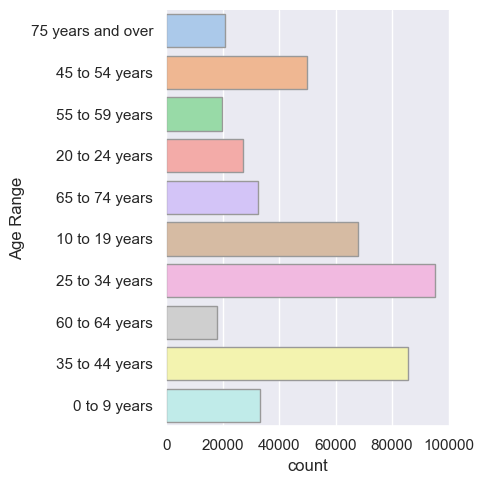

In [11]:
plt.show()

In [12]:
sns.countplot(data=df, y="Age Range", stat="percent", hue="Age Range", palette="pastel", edgecolor=".6", legend=False)

<Axes: xlabel='percent', ylabel='Age Range'>

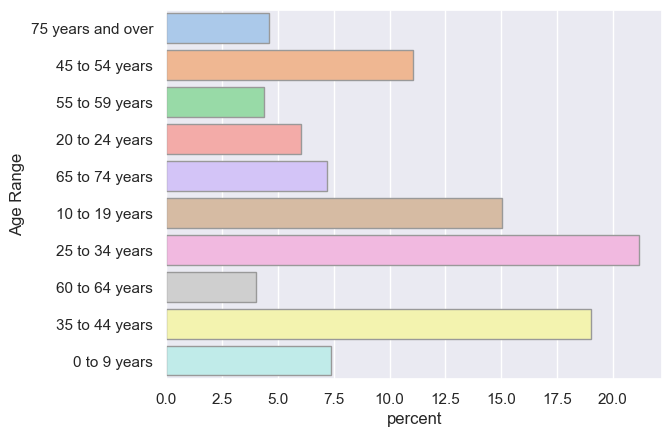

In [13]:
plt.show()

Die Grafik zeigt die prozentuale Verteilung der Bibliotheksbenutzer nach Altersgruppen. 

### Wie viele Nutzer möchten per Mail informiert werden?

In [14]:
# Anzahl der Bibliotheksbenutzer, die per Mail informiert werden möchten, ermitteln
# Für jede Ausprägung die Anzahl der Beobachtungen mithilfe der Methode value_counts() ausgeben lassen
df['Notice Preference Definition'].value_counts()

Notice Preference Definition
Email    409071
Phone     31710
Print      6263
Name: count, dtype: int64

In [15]:
# Mit dem zusätzlichen Argumentaufruf normalize=True werden die relativen Häufigkeiten berechnet
df['Notice Preference Definition'].value_counts(normalize=True)

Notice Preference Definition
Email    0.915058
Phone    0.070933
Print    0.014010
Name: proportion, dtype: float64

In [16]:
len(df['Notice Preference Definition'])

450359

In [17]:
# Anzahl der Bibliotheksbenutzer ermitteln, für die keinen Kommunikationsweg vermerkt wurde
df.loc[df['Notice Preference Definition'].isna() == True]

,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
96,Senior,0,0,65 to 74 years,Main,Oct,2023.0,NaN,False,2022,False
339,Adult,0,0,60 to 64 years,Main,Mar,2024.0,NaN,True,2019,False
428,Adult,0,0,55 to 59 years,Main,NaN,NaN,NaN,False,2023,False
584,Adult,0,0,60 to 64 years,Main,Mar,2024.0,NaN,False,2019,False
749,Adult,7,20,45 to 54 years,Main,Dec,2023.0,NaN,False,2021,False
...,...,...,...,...,...,...,...,...,...,...,...
450302,Digital Access Card,0,0,45 to 54 years,Eureka Valley,Dec,2021.0,NaN,False,2021,NaN
450323,Digital Access Card,0,0,35 to 44 years,Glen Park,Jul,2023.0,NaN,False,2023,NaN
450338,Digital Access Card,0,0,25 to 34 years,Anza,Sep,2022.0,NaN,False,2022,NaN
450348,Digital Access Card,0,0,45 to 54 years,Park,Sep,2021.0,NaN,False,2021,NaN


In [18]:
# Der NaN-Wert in der Spalte 'Notice Preference Definition' durch "keine Angabe" ersetzen 
df['Notice Preference Definition'].fillna("keine Angabe")

0         Email
1         Email
2         Email
3         Email
4         Print
          ...  
450354    Email
450355    Print
450356    Print
450357    Print
450358    Email
Name: Notice Preference Definition, Length: 450359, dtype: object

Ergebnis: 
409.071 von insgesamt 450.359 Bibliotheksbenutzern (das sind 91,5%) möchten Informationen per Mail erhalten.
Nur 6.263 der insgesamt 450.359 Bibliotheksbenutzer (das sind 1,4%) bevorzugen den Postweg zum Erhalt von Informationen.
Für 3.315 der Bibliotheksbenutzer (das sind nur 0,7% der insgesamt 450.359 Bibliotheksbenutzer) wurde keine Angabe 
zum Kommunikationsweg vermerkt. Die untere Grafik zeigt das Mengenverhältnis bezüglich des Benachrichtigungswegs. 

In [19]:
sns.countplot(data=df, x="Notice Preference Definition", hue='Notice Preference Definition', stat='count', legend=False)

<Axes: xlabel='Notice Preference Definition', ylabel='count'>

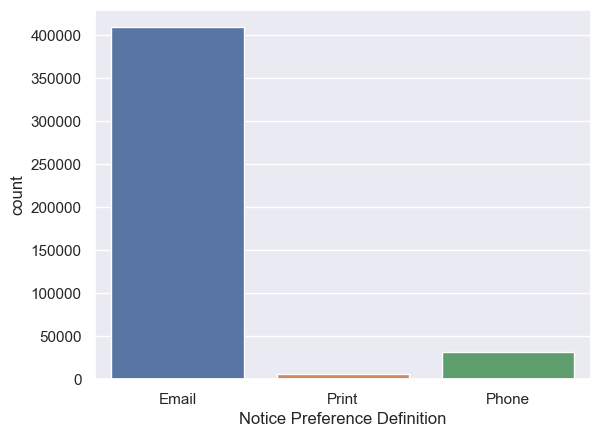

In [20]:
plt.show()

### Wie alt sind diese Nutzer durchschnittlich im Vergleich zu Nutzern, die per Post informiert werden möchten?

In [21]:
# Die Kategorien der Spalte "Age Range" anzeigen lassen
df['Age Range'].unique()

array(['75 years and over', '45 to 54 years', '55 to 59 years',
       '20 to 24 years', '65 to 74 years', '10 to 19 years',
       '25 to 34 years', '60 to 64 years', '35 to 44 years',
       '0 to 9 years', nan], dtype=object)

In [22]:
# Die mit "NaN" kodierten fehlenden Werte durch "keine Angabe" ersetzen
df['Age Range'].fillna("keine Angabe")

0         75 years and over
1            45 to 54 years
2            55 to 59 years
3            20 to 24 years
4            65 to 74 years
                ...        
450354       35 to 44 years
450355       45 to 54 years
450356       25 to 34 years
450357       35 to 44 years
450358       65 to 74 years
Name: Age Range, Length: 450359, dtype: object

In [23]:
# Die Werte in der Spalte "Notice Preference Definition" nach dem Wert "Email" filtern
row_filter = (df['Notice Preference Definition'] == 'Email')

In [24]:
# Das Filter-Ergebnis wird der Variable email zugewiesen
email = df.loc[row_filter]

In [25]:
email

,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
0,Senior,5,0,75 years and over,Main,Nov,2022.0,Email,True,2015,False
1,Adult,0,0,45 to 54 years,Main,Jul,2023.0,Email,True,2019,False
2,Adult,0,0,55 to 59 years,Western Addition,Mar,2024.0,Email,True,2022,False
3,Welcome,1,1,20 to 24 years,Richmond,Aug,2022.0,Email,True,2022,False
5,Senior,0,0,75 years and over,Main,Apr,2021.0,Email,True,2009,False
...,...,...,...,...,...,...,...,...,...,...,...
450351,Digital Access Card,0,0,35 to 44 years,Ingleside,Sep,2023.0,Email,False,2023,NaN
450352,Digital Access Card,0,0,45 to 54 years,Ingleside,May,2023.0,Email,False,2023,NaN
450353,Digital Access Card,0,0,35 to 44 years,Ingleside,Jan,2023.0,Email,False,2023,NaN
450354,Digital Access Card,0,0,35 to 44 years,Ingleside,NaN,NaN,Email,False,2023,NaN


In [26]:
# Die Werte der Variable email werden anhand der Alterskategorien in der Spalte "Age Range" gruppiert
email.groupby(by='Age Range').size()

Age Range
0 to 9 years         30075
10 to 19 years       56115
20 to 24 years       24544
25 to 34 years       90890
35 to 44 years       81600
45 to 54 years       46797
55 to 59 years       18086
60 to 64 years       16091
65 to 74 years       27987
75 years and over    16437
dtype: int64

In [27]:
sns.displot(data=email, y='Age Range', binwidth=2)

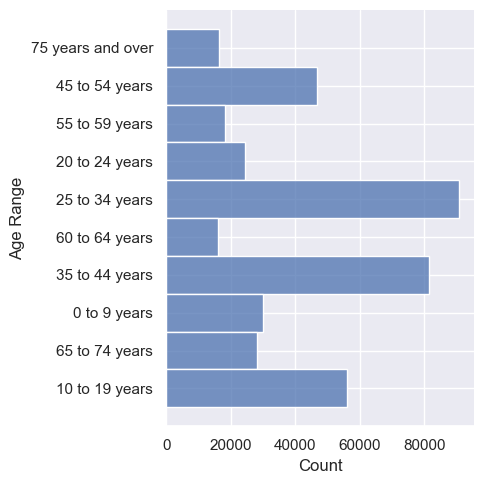

In [28]:
plt.show()

Ergebnis:
Die Bibliotheksbenutzer, die per Email informiert werden möchte, sind in allen Altersgruppen repräsentiert. Nur die Anzahl ist unterschiedlich groß.
Die Grafik zeigt, dass die Gruppe der Bibliotheksbenutzer im Alter von 25-34 Jahren mit einer Anzahl von 90.890 Personen die größte Gruppe ist. Es folgt die Gruppe der Bibliotheksbenutzer im Alter von 35-44 Jahren mit einer Gesamtanzahl von 81.600 Personen. Auch in der Gruppe der Bibliotheksbenutzer mit einem Alter zwischen 10-19 Jahren bevorzugen 56.115 Personen die Email als Informationsweg. 

In [29]:
# Die Werte in der Spalte "Notice Preference Definition" nach dem Wert "Print" filtern
row_filter_p = (df['Notice Preference Definition'] == 'Print')

In [30]:
# Das Filter-Ergebnis wird der Variable print zugewiesen
print = df.loc[row_filter_p]

In [31]:
# Die Werte der Variable print werden anhand der Alterskategorien in der Spalte "Age Range" gruppiert
print.groupby(by='Age Range').size()

Age Range
0 to 9 years         1030
10 to 19 years        628
20 to 24 years        263
25 to 34 years       1000
35 to 44 years        968
45 to 54 years        596
55 to 59 years        279
60 to 64 years        299
65 to 74 years        627
75 years and over     542
dtype: int64

Ergebnis: Die Bibliotheksbenutzer, die per Brief informiert werden möchte, sind ebenfalls in allen Altersgruppen repräsentiert. 
Die Altersgruppen 0-9 Jahre und 25-34 Jahre umfassen 1030 bzw. 1000 Personen. Mit 968 Personen ist die Gruppe der Bibliotheksbenutzer im Alter von 35-44 Jahren die drittgrößte Gruppe, die den Brief als Informationsweg bevorzugt. Die untere Grafik zeigt die verhältnismäßige Verteilung der Personen, die Informationen per Postweg bevorzugen, in den Alterskategorien des Datensets.

In [32]:
# sns.boxenplot(data=print, y="Age Range", width=.2, linewidth=.2, linecolor=".7")
sns.displot(data=print, kind="ecdf", y='Age Range')

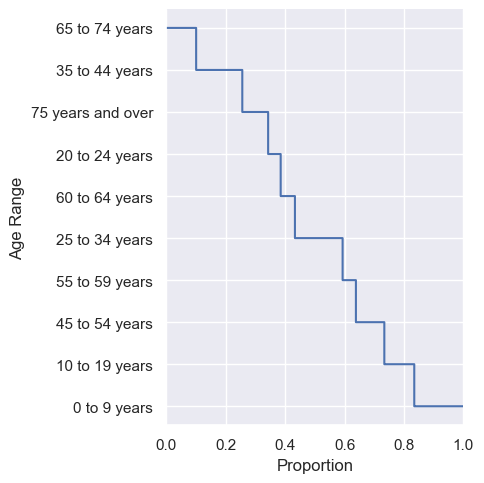

In [33]:
plt.show()

### Wie viele Ausleihen werden pro Altersgruppe und pro Jahr getätigt? 

In [34]:
# Werte in der Spalte 'Circulation Active Year' werden mithilfe der Funktion to_numeric()
# in ein nummerisches Datenformat konvertiert
# Mit dem Parameter errors=‘coerce’ werden invalide Werte durch "NaN" ersetzt
df['Circulation Active Year'] = pd.to_numeric(df['Circulation Active Year'], errors='coerce')

In [35]:
df['Circulation Active Year']

0         2022.0
1         2023.0
2         2024.0
3         2022.0
4         2024.0
           ...  
450354       NaN
450355    2022.0
450356    2022.0
450357    2022.0
450358    2023.0
Name: Circulation Active Year, Length: 450359, dtype: float64

In [36]:
# Anzahl der Bibliotheksbenutzer, die nichts ausgeliehen haben, ermitteln
df.loc[(df['Circulation Active Year'].isna() == True) & (df['Total Checkouts'] == 0)]

,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
14,Teacher Card,0,0,0 to 9 years,Main,NaN,NaN,Email,True,2023,False
17,Teacher Card,0,0,45 to 54 years,Main,NaN,NaN,Email,True,2020,False
36,Senior,0,0,65 to 74 years,Main,NaN,NaN,Email,True,2023,False
93,Senior,0,0,65 to 74 years,Main,NaN,NaN,Email,True,2023,False
127,Senior,0,0,65 to 74 years,Main,NaN,NaN,Email,True,2018,False
...,...,...,...,...,...,...,...,...,...,...,...
450321,Digital Access Card,0,0,60 to 64 years,Glen Park,NaN,NaN,Email,False,2023,NaN
450324,Digital Access Card,0,0,45 to 54 years,Glen Park,NaN,NaN,Email,False,2023,NaN
450339,Digital Access Card,0,0,75 years and over,Marina,NaN,NaN,Email,True,2022,NaN
450340,Digital Access Card,0,0,45 to 54 years,Marina,NaN,NaN,Email,True,2022,NaN


In [37]:
# Die benötigten Merkmale selektieren
df_selection = df[['Total Checkouts', 'Age Range', 'Circulation Active Year']]

In [38]:
df_selection

,Total Checkouts,Age Range,Circulation Active Year
0,5,75 years and over,2022.0
1,0,45 to 54 years,2023.0
2,0,55 to 59 years,2024.0
3,1,20 to 24 years,2022.0
4,0,65 to 74 years,2024.0
...,...,...,...
450354,0,35 to 44 years,NaN
450355,0,45 to 54 years,2022.0
450356,0,25 to 34 years,2022.0
450357,0,35 to 44 years,2022.0


In [39]:
# Merkmalsausprägungen nach "Age Range" gruppieren
ages = df_selection.groupby(by='Age Range')

In [40]:
# Mittelwert für die "Total Checkouts" berechnen
ages['Total Checkouts'].mean()

Age Range
0 to 9 years          61.696504
10 to 19 years       194.417574
20 to 24 years       168.209615
25 to 34 years        48.293121
35 to 44 years        72.401966
45 to 54 years       172.639482
55 to 59 years       250.542336
60 to 64 years       287.392802
65 to 74 years       351.826683
75 years and over    434.967762
Name: Total Checkouts, dtype: float64

In [41]:
# Merkmalsausprägungen nach "Circulation Active Year" gruppieren
years = df_selection.groupby(by='Circulation Active Year')

In [42]:
# Mittelwert für die "Total Checkouts" berechnen
years['Total Checkouts'].mean()

Circulation Active Year
2004.0      2.250000
2005.0      9.000000
2006.0     35.750000
2007.0     28.700000
2008.0     30.850000
2009.0     34.200000
2010.0     35.230769
2011.0     36.971429
2012.0     50.096774
2013.0     54.891626
2014.0     75.564033
2015.0     89.128527
2016.0    126.925490
2017.0    110.228529
2018.0    127.964270
2019.0    123.646594
2020.0     86.022158
2021.0    120.753493
2022.0    117.620685
2023.0    114.636607
2024.0    233.923201
Name: Total Checkouts, dtype: float64

In [45]:
sns.relplot(data=df_selection, x="Total Checkouts", y="Circulation Active Year", hue="Age Range")

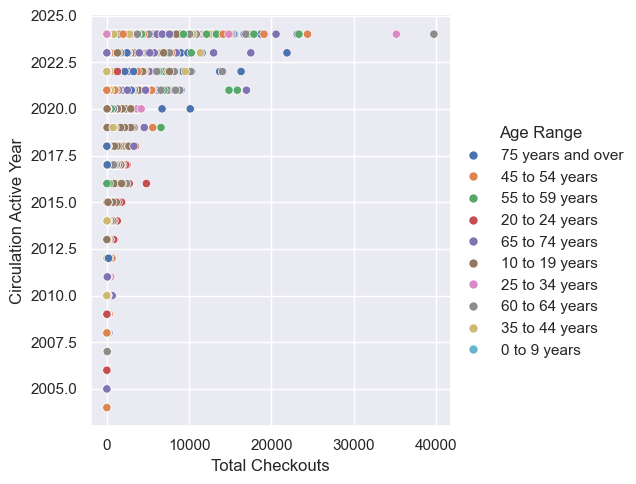

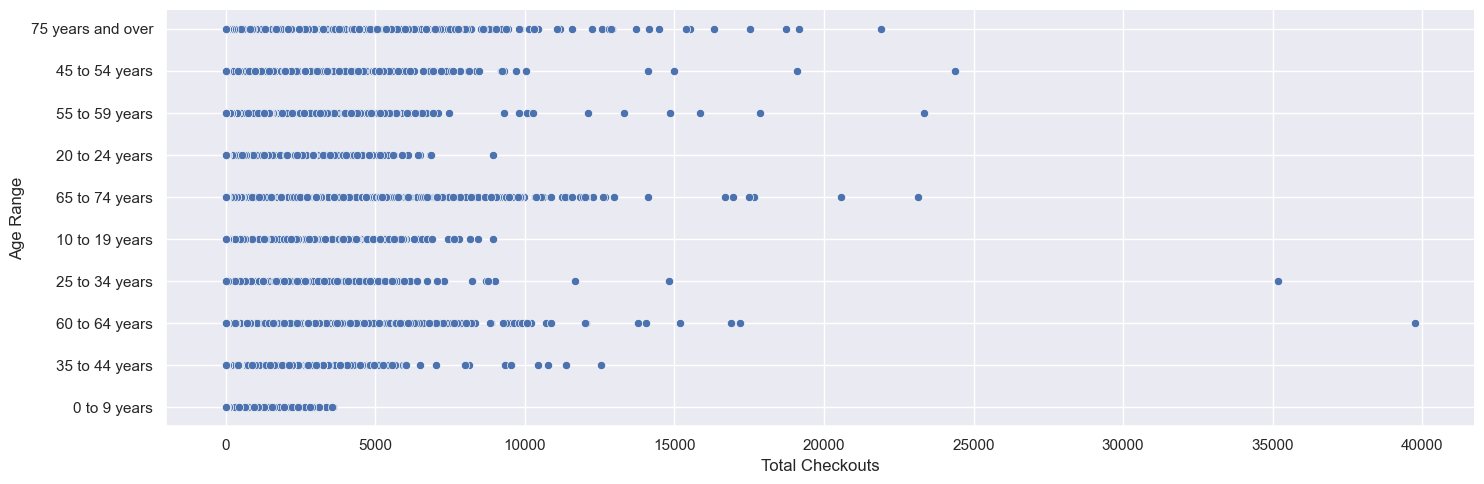

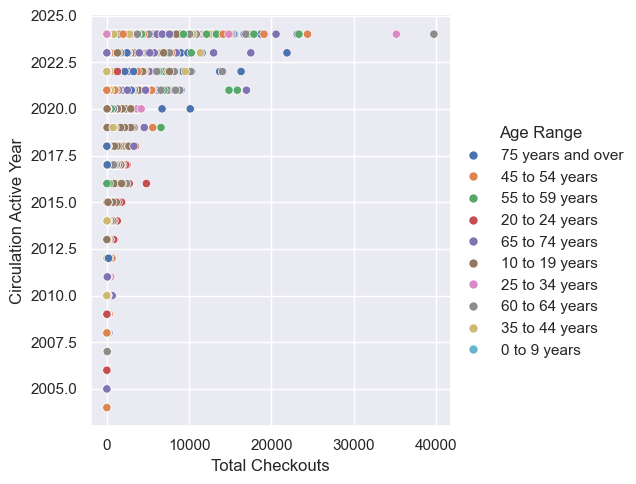

In [46]:
plt.show()

In [47]:
sns.relplot(data=df_selection, x="Total Checkouts", y="Age Range", height=5, aspect=3)

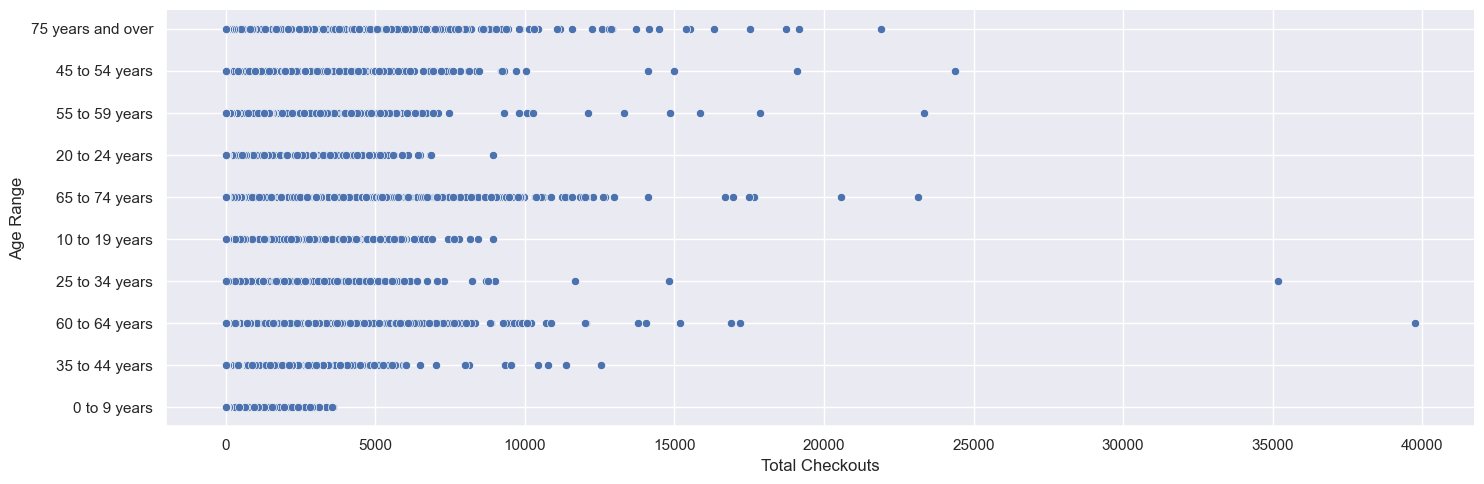

In [48]:
plt.show()

Die oberen Grafiken zeigen die Verteilung der Ausleihen pro Altergruppe.